# [Phystech@DataScience](https://thetahat.ru/courses/ph-ds-2025-spr)
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

-----
**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 5 &mdash; 30 баллов
* Задача 6 &mdash; 35 баллов


-----

In [2]:
# Bot check

# HW_ID: phds_hw9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [23]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
from scipy import stats
from statsmodels.stats.multitest import multipletests
from itertools import combinations


### <b><i><font color="blue">Легкая часть</font></i></b>

### Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за легкую часть задания 3 и 5 весной 2023.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1GSw2_vAMQ4XZcAf8Y_99CkJ1oi4_LrHyWIS-DCdFE0Y/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [ ]:
df = pd.read_excel("Успеваемость ph@ds, весна 2023.xlsx", sheet_name="Домашние задания")

hw3 = df.iloc[3:, 6].dropna().tolist()
hw5 = df.iloc[3:, 10].dropna().tolist()

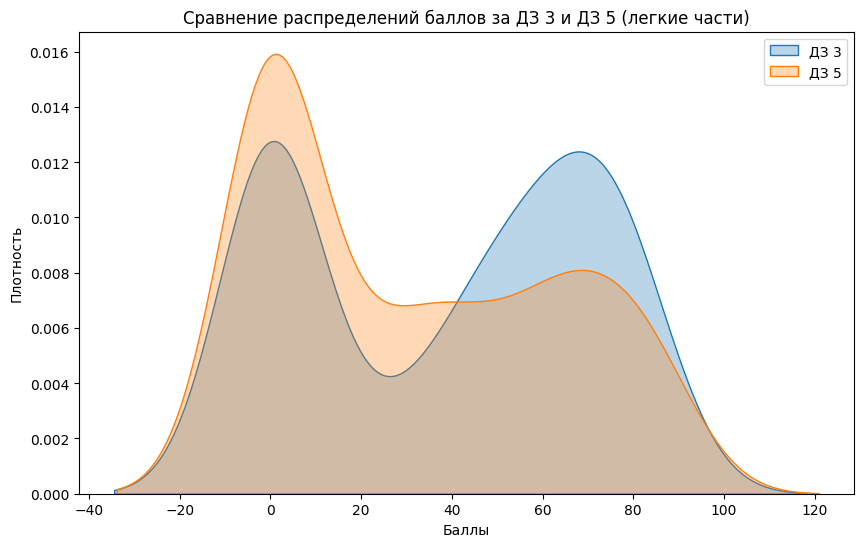

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(hw3, label="ДЗ 3", fill=True, alpha=0.3)
sns.kdeplot(hw5, label="ДЗ 5", fill=True, alpha=0.3)
plt.xlabel("Баллы")
plt.ylabel("Плотность")
plt.title("Сравнение распределений баллов за ДЗ 3 и ДЗ 5 (легкие части)")
plt.legend()
plt.show()

In [ ]:
hw3_mean = np.mean(hw3)
hw5_mean = np.mean(hw5)
print('hw3', hw3_mean, 'hw5', hw5_mean)

hw3 38.73823529411764 hw5 30.99705882352941


In [ ]:
t_stat, p_value = sps.ttest_ind(hw3, hw5)
print(f"p-value = {p_value}")

p-value = 0.02546658586159689


In [ ]:
diff = hw3_mean - hw5_mean
n1, n2 = len(hw3), len(hw5)
std1, std2 = np.std(hw3, ddof=1), np.std(hw5, ddof=1)
std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2))
se = std * np.sqrt(1/n1 + 1/n2)
t_crit = stats.t.ppf(0.975, df=n1 + n2 - 2)

ci_low = diff - t_crit * se
ci_high = diff + t_crit * se

print(f"Сдвиг = {diff:.2f} ± {t_crit * se:.2f}")
print(f"ДИ: [{ci_low:.2f}, {ci_high:.2f}]")

Сдвиг = 7.74 ± 6.79
ДИ: [0.96, 14.53]


Сделайте общий вывод по задаче.

**Вывод:** средния значения выборок 39 и 31, значение p-value < 0.05, значит гипотеза о равенстве средних отвергается. По графикам видно, что количество низких(0) оценок в 5 дз больше, а высоких - меньше, что согласуется с результатами. Сдвиг среднего получается 7.74 ± 6.79

### Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

In [ ]:
my305 = [10, 5, 6, 6, 6, 9, 5, 6, 9, 3, 7, 7, 10, 8, 8, 10, 8, 6]
nn307 = [6, 7, 7, 3, 8, 8, 5, 10, 8, 10, 10, 4, 5, 10, 6, 7]

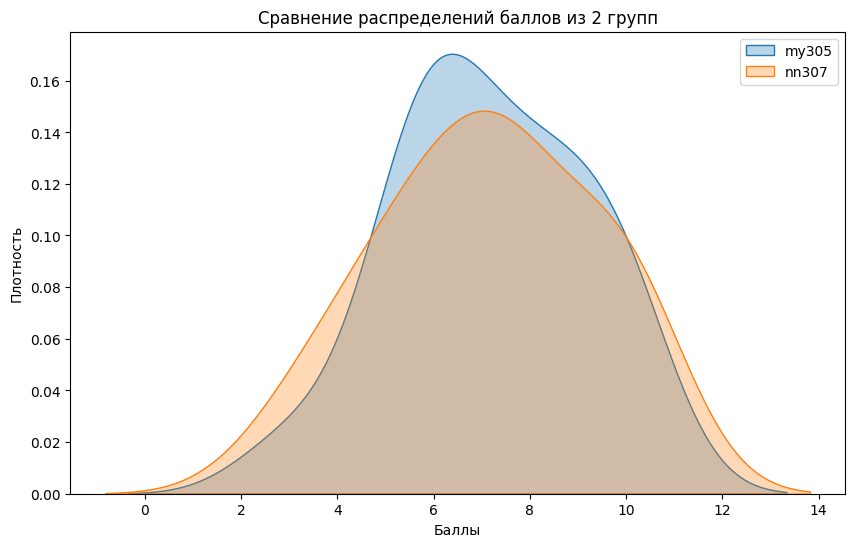

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(my305, label="my305", fill=True, alpha=0.3)
sns.kdeplot(nn307, label="nn307", fill=True, alpha=0.3)
plt.xlabel("Баллы")
plt.ylabel("Плотность")
plt.title("Сравнение распределений баллов из 2 групп")
plt.legend()
plt.show()

In [ ]:
my305_mean = np.mean(my305)
nn307_mean = np.mean(nn307)
print('305', my305_mean, '307', nn307_mean)

305 7.166666666666667 307 7.125


In [ ]:
t_stat, p_value = sps.ttest_ind(my305, nn307)
print(f"p-value = {p_value}")

p-value = 0.9541682550177017


In [ ]:
diff = my305_mean - nn307_mean
n1, n2 = len(my305), len(nn307)
std1, std2 = np.std(my305, ddof=1), np.std(nn307, ddof=1)
std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2))
se = std * np.sqrt(1/n1 + 1/n2)
t_crit = stats.t.ppf(0.975, df=n1 + n2 - 2)

ci_low = diff - t_crit * se
ci_high = diff + t_crit * se

print(f"Сдвиг = {diff:.2f} ± {t_crit * se:.2f}")
print(f"ДИ: [{ci_low:.2f}, {ci_high:.2f}]")

Сдвиг = 0.04 ± 1.47
ДИ: [-1.42, 1.51]


**Вывод:** по графику тяжело определить различия. Гипотезу о равенстве средних баллов подтверждает и p-value, близкое к 1. Сдвиг близок к 0 с погрешностью в полтора балла из-за небольшой величины группы и заметной дисперсии.

### Задача 3


Предположим, что вы разработали лекарство от коронавируса. Перед применением оно обязательно должно пройти клинические испытания. Для начала было разрешено проверить лекарство на двух независимых группах по 10 человек. Одна группа принимает плацебо, другая -- ваш препарат. Большее количество пациентов на первом этапе брать не разрешают -- слишком велики риски отрицательного результата.

Для каждого пациента измерялось количество дней от приема препарата до выздоровления. Получились следуюшие результаты:

In [ ]:
x = [6, 16, 8, 13, 9, 4, 7, 10, 3, 14]  # плацебо
y = [5, 10, 3, 1, 5, 3, 19, 2, 2, 5]  # лекарство

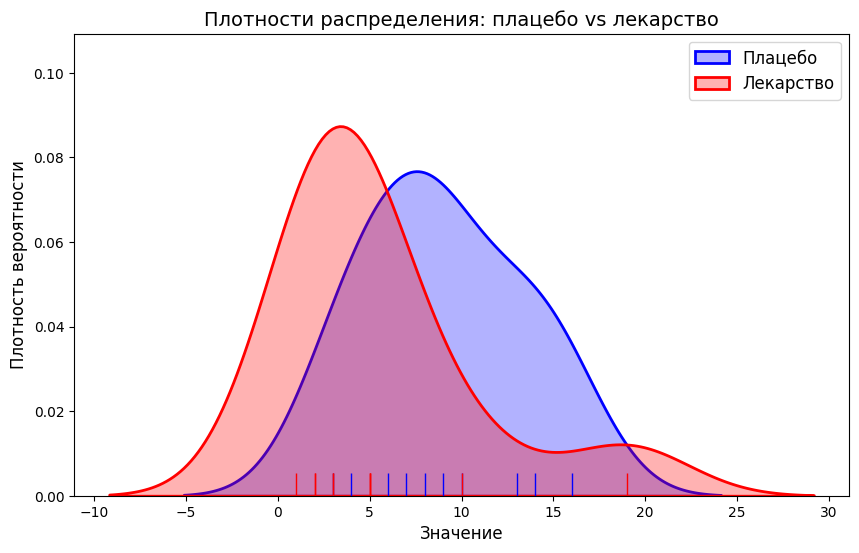

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(x, color="blue", label="Плацебо", fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(y, color="red", label="Лекарство", fill=True, alpha=0.3, linewidth=2)

sns.rugplot(x, color="blue", height=0.05, lw=1)
sns.rugplot(y, color="red", height=0.05, lw=1)

plt.title("Плотности распределения: плацебо vs лекарство", fontsize=14)
plt.xlabel("Значение", fontsize=12)
plt.ylabel("Плотность вероятности", fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print('плацебо', x_mean, 'лекартсво', y_mean)

плацебо 9.0 лекартсво 5.5


In [ ]:
print("Нормальность x:", stats.shapiro(x).pvalue > 0.05)
print("Нормальность y:", stats.shapiro(y).pvalue > 0.05)

t_stat, p_value = stats.ttest_ind(x, y, alternative='greater', equal_var=True)
print(f"p-value = {p_value}")

Нормальность x: True
Нормальность y: False
p-value = 0.06263984553648462


In [ ]:
diff = x_mean - y_mean
n1, n2 = len(x), len(y)
std1, std2 = np.std(x, ddof=1), np.std(y, ddof=1)
std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2))
se = std * np.sqrt(1/n1 + 1/n2)
t_crit = stats.t.ppf(0.975, df=n1 + n2 - 2)

ci_low = diff - t_crit * se
ci_high = diff + t_crit * se

print(f"Сдвиг = {diff:.2f} ± {t_crit * se:.2f}")
print(f"ДИ: [{ci_low:.2f}, {ci_high:.2f}]")

Сдвиг = 3.50 ± 4.57
ДИ: [-1.07, 8.07]


Что вы можете сказать на основе этих результатов?
* Лекарство эффективнее, подтверждается статистическими методами;
* Наверное, лекарство эффективнее, но статистическими методами это пока не подтверждено, нужно продолжить эксперимент. Подумайте, как обосновать необходимость продолжение эксперимента;
* По результатам эксперимента нельзя сделать какой-либо вывод. Стоит ли продолжать эксперименты? Если да, то четко это обоснуйте;
* Лекарство неэффективно, нужно немедленно прекращать эксперимент.

**Вывод:**

Гипотеза о том, что лекарство эффективно не отвергается, есть смысл продолжать испытания, тк наблюдается положительный эффект. Нельзя уверенно утверждать о работе препарата (результат не стат значим), а данные слишком мальенькие и устремление их к нормальному распределению некорректно, из-за чего значение p-value (0.06 > 0.05) и ДИ не совсем показательны (в их получении используется стремление к нормальному распределению).

### Задача 4

Пусть $X=(X_1, \dots, X_n)$, $Y=(Y_1, \dots, Y_m)$ - независимые выборки из нормального распределения.

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$.

C помощью t-test проверяется пара гипотез

$$\mathsf{H}_0\colon EX_1 = 0 \text{ vs } \mathsf{H}_1\colon EX_1 < 0$$

$$\mathsf{H}_0\colon EY_1 = 0 \text{ vs } \mathsf{H}_1\colon EY_1 > 0$$

Оцените реальный уровень значимости процедуры, если обе гипотезы проверяются на уровне $\alpha=0.05$. Совпадает ли он с $\alpha$? Предложите способ сделать так, чтобы он был равен $\alpha$.

In [ ]:
sample_size = 50
sample_count = 1000
alpha = 0.05

np.random.seed(42)
X = np.random.normal(loc=0, scale=1, size=(sample_count, sample_size))
Y = np.random.normal(loc=0, scale=1, size=(sample_count, sample_size))

rejections = 0

for i in range(sample_count):
    t_stat_X, p_value_X = stats.ttest_1samp(X[i], popmean=0, alternative='less')

    t_stat_Y, p_value_Y = stats.ttest_1samp(Y[i], popmean=0, alternative='greater')

    if p_value_X < alpha or p_value_Y < alpha:
        rejections += 1

real_a = rejections / sample_count
print(f"Реальный уровень значимости: {real_a:.4f}")

Реальный уровень значимости: 0.0940


Из-за множественной проверки гипотез реальный уровень значимости оказался почти в 2 раза больше α, это получается из-за сложения вероятностей 2 независимых событий: $a_r = 1 - (1- α)^m$, m = 2.

Можно воспользоваться поправкой Бонферрони изменив уровень значимости для каждого эксперимента на $\alpha / m$

In [ ]:
rejections = 0

for i in range(sample_count):
    t_stat_X, p_value_X = stats.ttest_1samp(X[i], popmean=0, alternative='less')

    t_stat_Y, p_value_Y = stats.ttest_1samp(Y[i], popmean=0, alternative='greater')

    if p_value_X < alpha / 2 or p_value_Y < alpha / 2:
        rejections += 1

real_a = rejections / sample_count
print(f"Реальный уровень значимости: {real_a:.4f}")

Реальный уровень значимости: 0.0550


При таких условиях реальный уровень близок к 0.05 и немного больше.

### <b><i><font color="orange">Сложная часть</font></i></b>
### Задача 5

**Профиль биология**


Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [ ]:
path = <...>
data = pd.read_csv(path)
data.head()

Выведем описательные статистики по вещественным параметрам.

In [ ]:
data.describe()

Количество записей по генотипам:

In [ ]:
data.Genotype.value_counts()

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`.

In [ ]:
<...>

Визуализируйте двумерные проекции данных и гистограммы с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета, подробнее можно почитать в [документации](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).

In [ ]:
<...>


##### 1. Зависимость распределения `DYRK1A_N` от генотипа

Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента.  В реальных исследованиях нужно использовать конкретную альтернативу.

Сделайте выводы.

In [ ]:
<...>

**Вывод**

Посчитайте реализацию доверительного интервала величины сдвига.


In [ ]:
<...>

##### 2. Зависимость распределения  `BDNF_N` от генотипа


Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы.

In [ ]:
<...>

**Вывод:** <...>

Как связаны доверительные интервалы с проверкой гипотез? Подтверждается ли это в данном примере?

**Ответ:**<...>

**Профиль физика**

Скачайте [данные](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download) моделирования неупругого рассеяния протонов и электронов. В датасете представлены 4 разных вида частиц (частицы одного вида имеют одинаковый id).

In [4]:
path = 'pid-5M.csv'
data = pd.read_csv(path)
data['id'].unique()

array([ 211, 2212,  321,  -11])

Постройте гистограммы признаков для каждого вида частиц.

In [5]:
features = data.columns.drop('id')
features

Index(['p', 'theta', 'beta', 'nphe', 'ein', 'eout'], dtype='object')

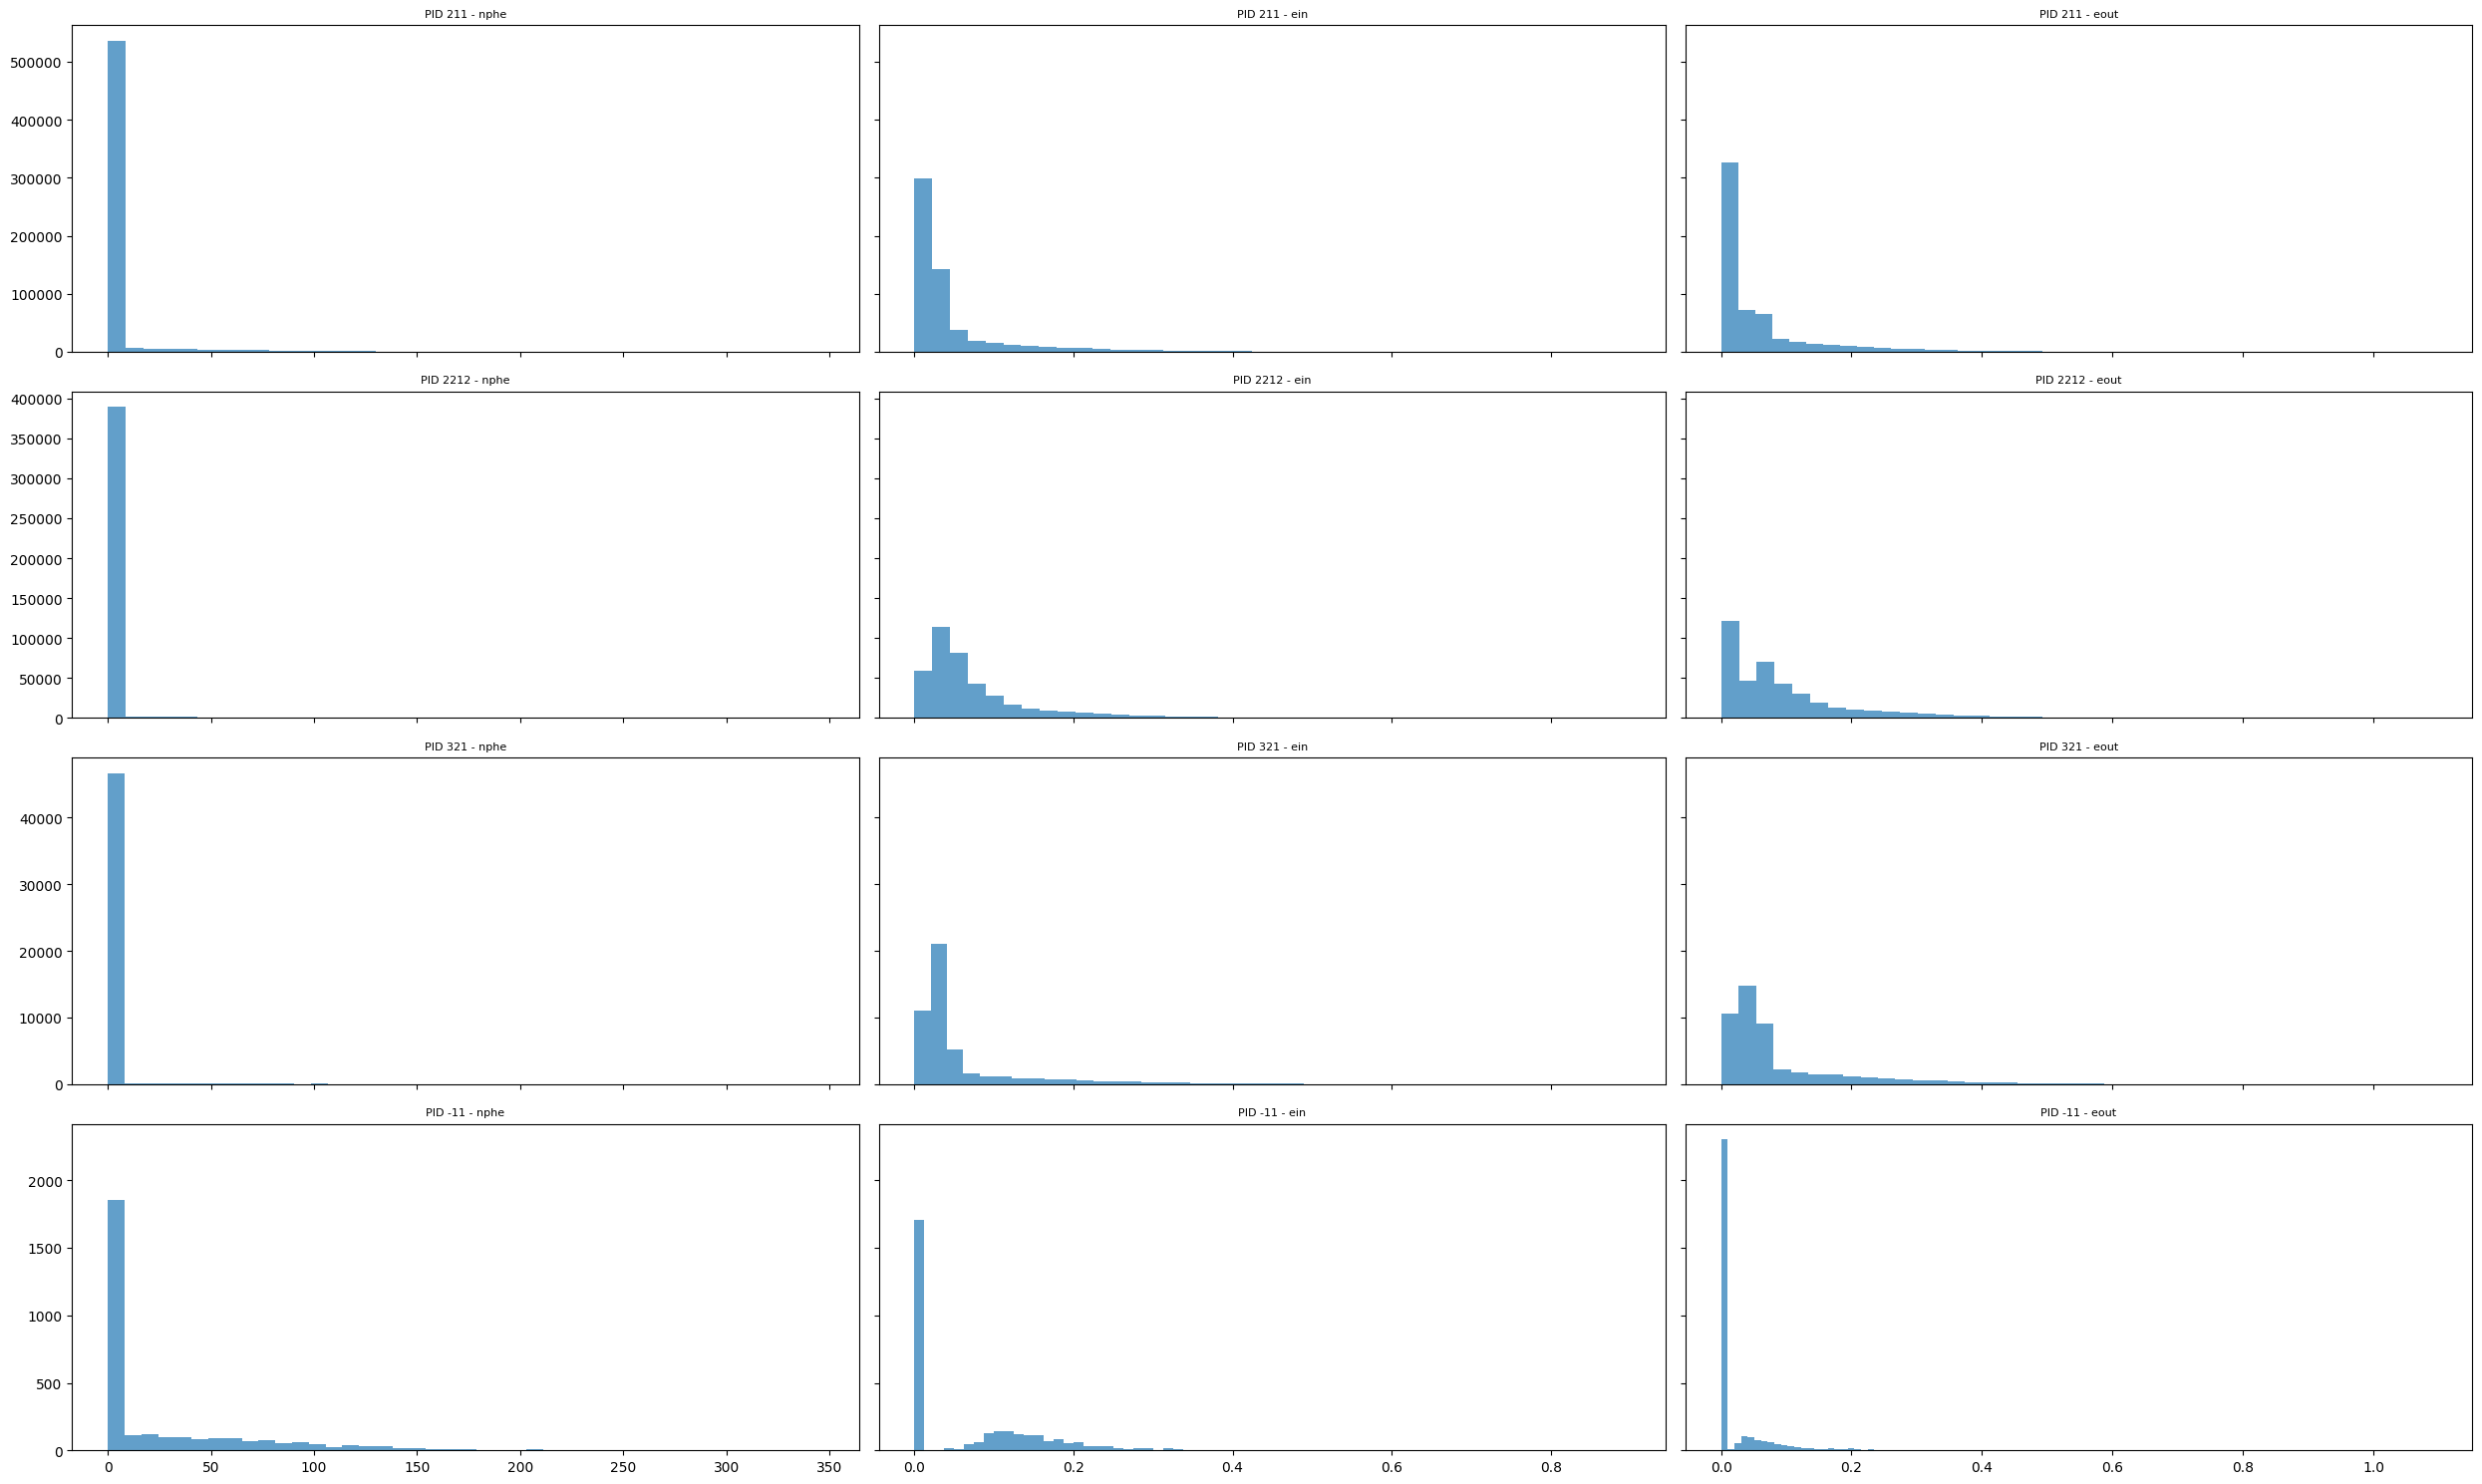

In [6]:
features = ['nphe', 'ein', 'eout']
particles = data['id'].unique()

fig, axes = plt.subplots(nrows=len(particles), ncols=len(features),
                        figsize=(25, 15), sharex='col', sharey='row')

for i, pid in enumerate(particles):
    particle_data = data[data['id'] == pid]
    for j, feature in enumerate(features):
        axes[i,j].hist(particle_data[feature], bins=40, alpha=0.7)
        axes[i,j].set_title(f'PID {pid} - {feature}', fontsize=8)

plt.tight_layout()
plt.show()


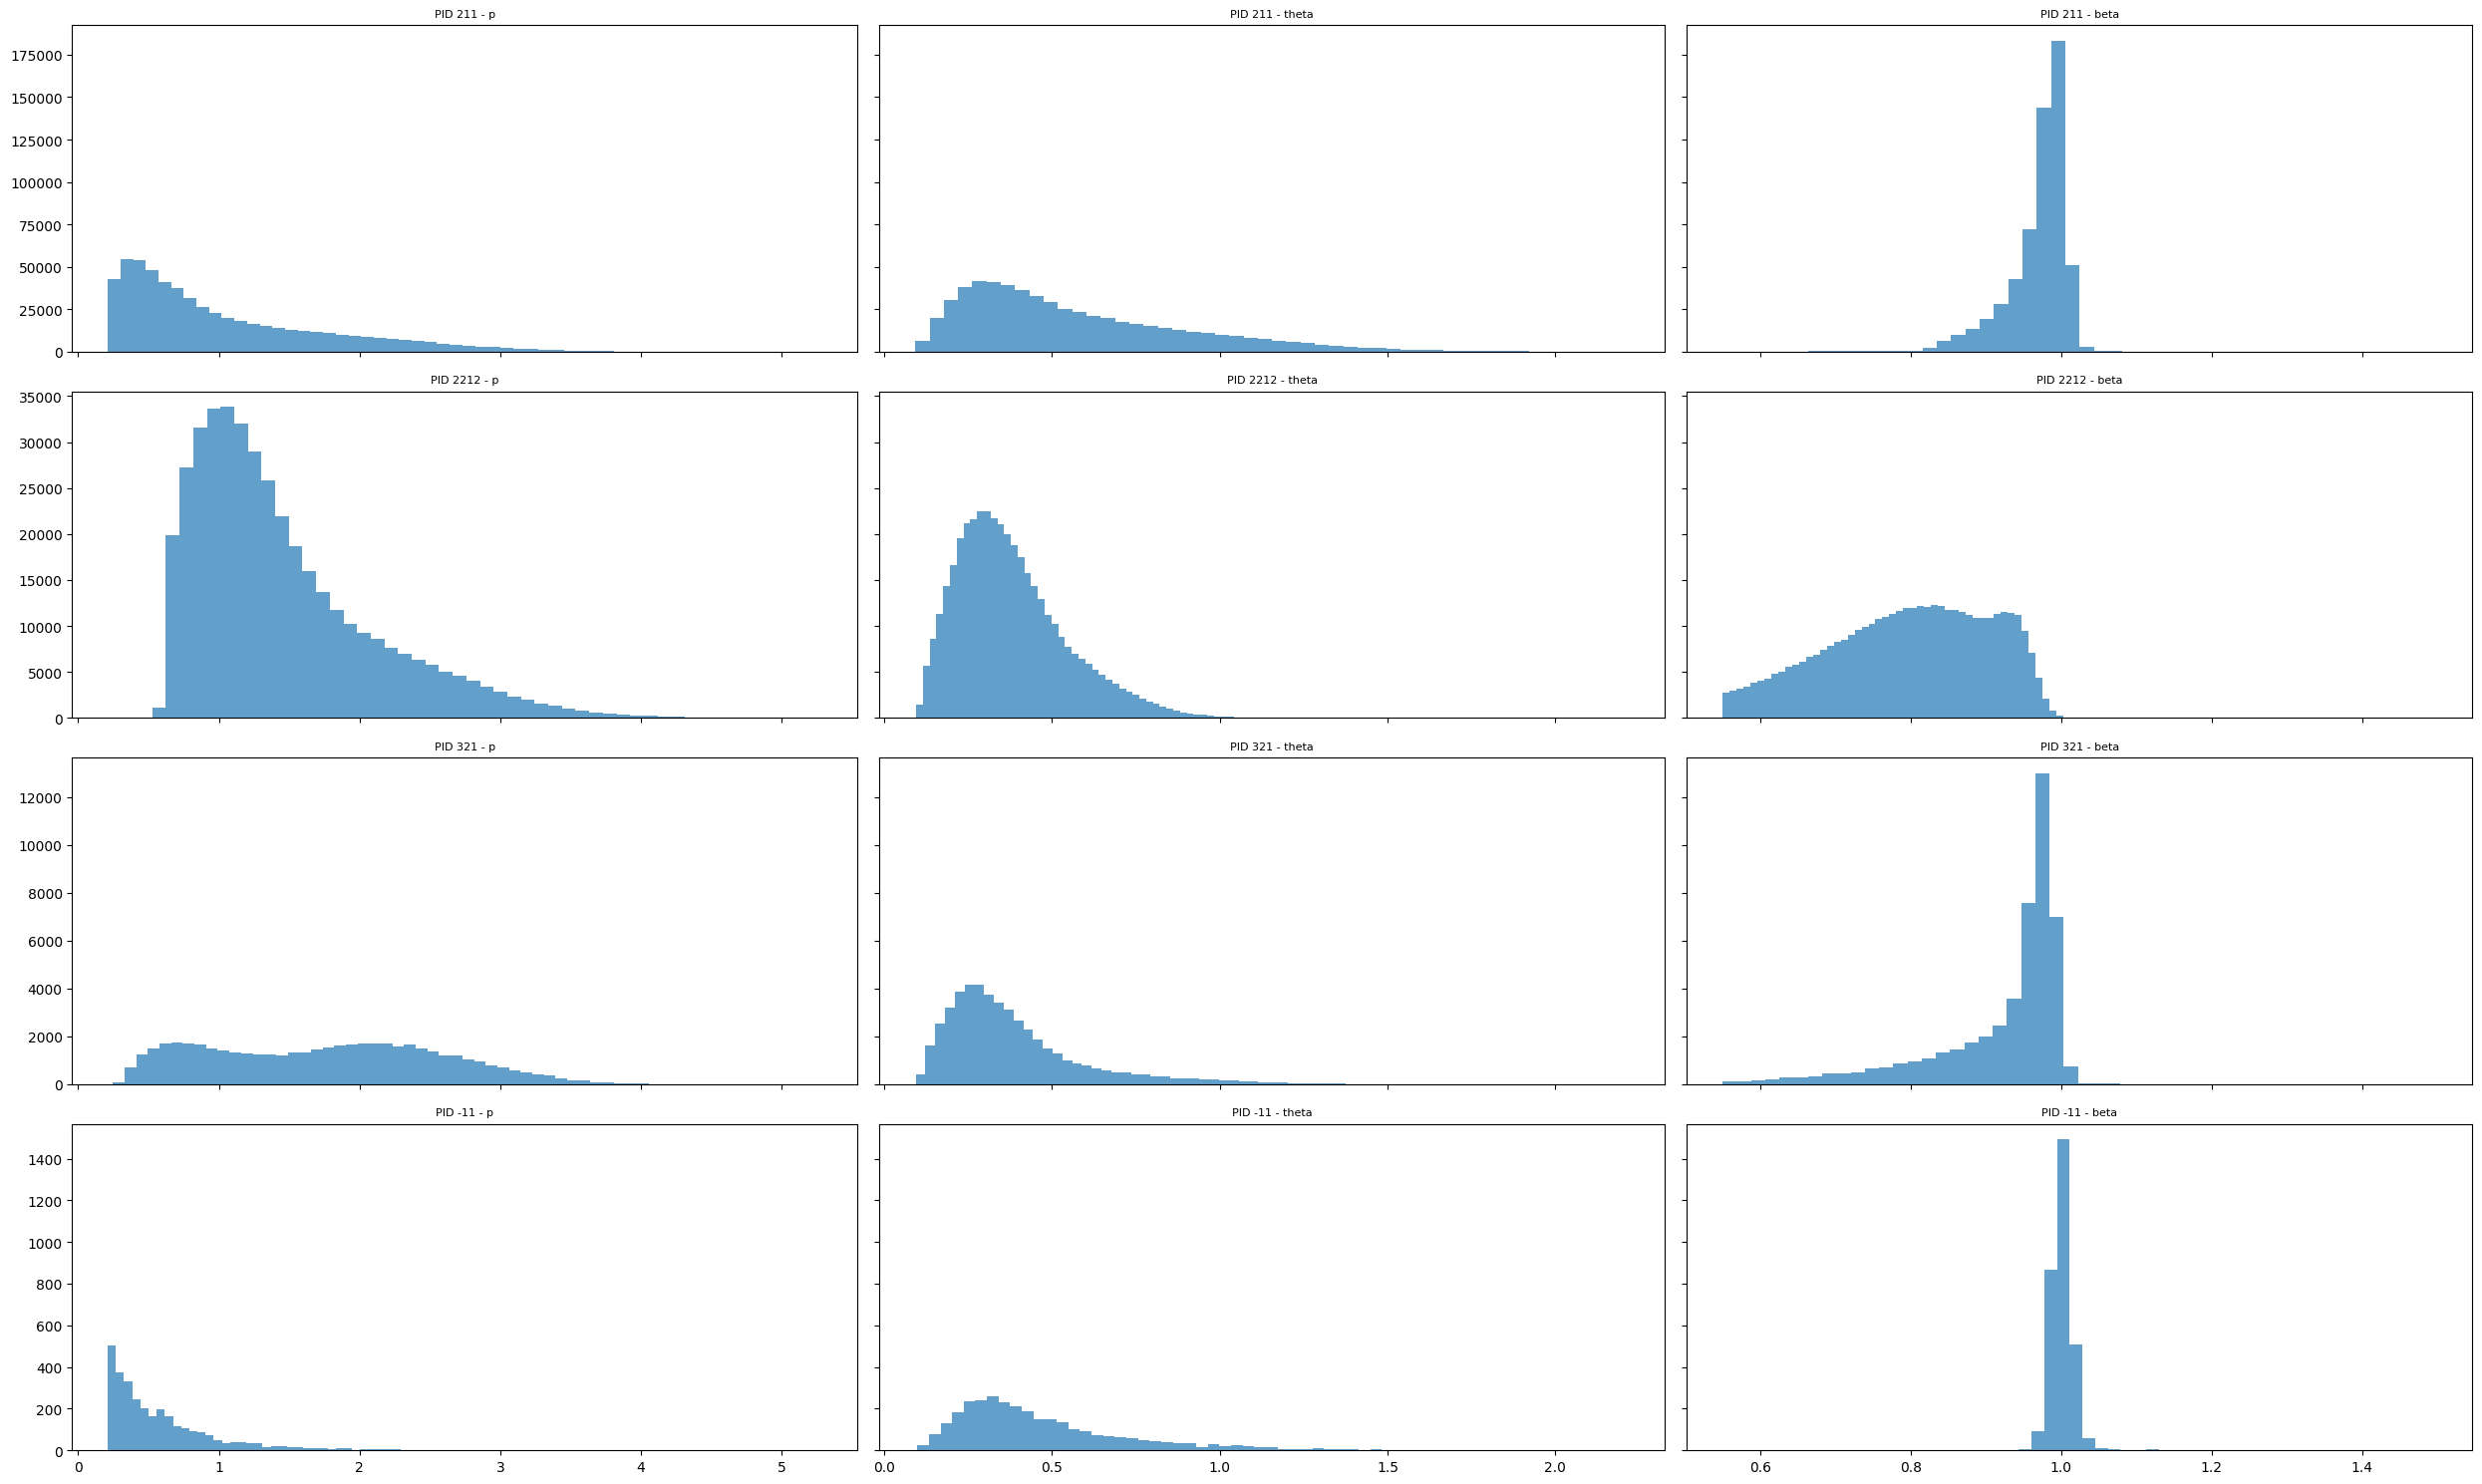

In [7]:
features = ['p', 'theta', 'beta']
particles = data['id'].unique()

fig, axes = plt.subplots(nrows=len(particles), ncols=len(features),
                        figsize=(25, 15), sharex='col', sharey='row')

for i, pid in enumerate(particles):
    particle_data = data[data['id'] == pid]
    for j, feature in enumerate(features):
        axes[i,j].hist(particle_data[feature], bins=50, alpha=0.7)
        axes[i,j].set_title(f'PID {pid} - {feature}', fontsize=8)

plt.tight_layout()
plt.show()


Для каждой частицы посчитайте среднее значение для каждой колонки с помощью `data.groupby`

In [8]:
means = data.groupby('id').mean()
means

,p,theta,beta,nphe,ein,eout
id,,,,,,
-11,0.591796,0.468175,1.001776,26.200521,0.067787,0.021483
211,1.034951,0.574126,0.968719,4.645168,0.042540,0.052166
321,1.739733,0.382487,0.921646,2.007320,0.060747,0.087686
2212,1.455814,0.378918,0.796629,2.056547,0.075840,0.094752


Для частиц и признаков с похожими средними значениями с помощью критерия Стьюдента проверьте гипотезу о равенстве средних. Не забудьте о МПГ.

Также посчитайте реализацию доверительного интервала величины сдвига. Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?


In [92]:
def test_feature_equality(particles, feature, alpha=0.05):
    pairs = [[-11, 211], [-11, 321], [-11, 2212], [211, 321], [211, 2212], [321, 2212]]
    p_values = []

    for pid1, pid2 in pairs:
        sample1 = data[data['id'] == pid1][feature].values
        sample2 = data[data['id'] == pid2][feature].values
        t_stat, p_val = sps.ttest_ind(sample1, sample2, equal_var=False)
        p_values.append(round(p_val, 4))


    return p_values


In [93]:
results = {}
features = data.columns.drop('id')
pcs = particles
for i in range(len(features)):
    feature = features[i]
    print(test_feature_equality(pcs ,feature, alpha))
results

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(nan), np.float64(0.0), np.float64(0.0), np.float64(nan), np.float64(nan), np.float64(0.0002)]
[np.float64(nan), np.float64(0.0), np.float64(0.0), np.float64(nan), np.float64(nan), np.float64(0.0)]
[np.float64(nan), np.float64(0.0), np.float64(0.0), np.float64(nan), np.float64(nan), np.float64(0.4491)]
[np.float64(nan), np.float64(0.0), np.float64(0.0), np.float64(nan), np.float64(nan), np.float64(0.0)]
[np.float64(nan), np.float64(0.0), np.float64(0.0), np.float64(nan), np.float64(nan), np.float64(0.0)]


{}

**Ответ:**

Сделайте вывод, по каким измерениям частицы тяжелее/проще всего различить.

**Вывод:** хуже всего определяются частицы по theta и nphe



### Задача 6

Задача является продолжением задачи 5 из прошлого домашнего задания.

Здесь вам необходимо наглядно сравнить два критерия из задачи 5 прошлого задания. Для этого проделайте все пункты для обоих критериев. Обязательно подписывайте какой график к какому критерию относится.


**1.** **Оцените реальный уровень значимости** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

In [ ]:
<...>

**Вывод:**

**2.** Для значений $n \in \{5, 15, 30, 50, 100\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.25 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

In [ ]:
<...>

**Вывод:**

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta \in (0, 5)$ по сетке с шагом 0.25.

In [ ]:
<...>

**Вывод:**...

Сделайте общий вывод по сравнению двух критериев.

**Вывод:**